In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

#Load the dataset
df = pd.read_excel('/content/Cleaned Titanic data.xlsx')

#Show the first class
df.head()

PassengerId Passenger class  Title                             Other names  \
0            1       3rd class     Mr                             Owen Harris   
1            2       1st class    Mrs   John Bradley (Florence Briggs Thayer)   
2            3       3rd class   Miss                                   Laina   
3            4       1st class    Mrs           Jacques Heath (Lily May Peel)   
4            5       3rd class     Mr                           William Henry   

     Surname  Gender   Age  Family size            Ticket     Fare Cabin  \
0     Braund    male  22.0            2         A/5 21171   7.2500   NaN   
1    Cumings  female  38.0            2          PC 17599  71.2833   C85   
2  Heikkinen  female  26.0            1  STON/O2. 3101282   7.9250   NaN   
3   Futrelle  female  35.0            2            113803  53.1000  C123   
4      Allen    male  35.0            1            373450   8.0500   NaN   

      Embarked  Survival  
0  Southampton      Died  
1    Cherbourg  Survived  
2  Southampton  Survived  
3  Southampton  Survived  
4  Southampton      Died

In [113]:
#Step 3:Describe data
df.describe(include='all')

PassengerId Passenger class Title Other names    Surname Gender  \
count    891.000000             891   891         891        891    891   
unique          NaN               3    17         799        667      2   
top             NaN       3rd class    Mr        John  Andersson   male   
freq            NaN             491   517           9          9    577   
mean     446.000000             NaN   NaN         NaN        NaN    NaN   
std      257.353842             NaN   NaN         NaN        NaN    NaN   
min        1.000000             NaN   NaN         NaN        NaN    NaN   
25%      223.500000             NaN   NaN         NaN        NaN    NaN   
50%      446.000000             NaN   NaN         NaN        NaN    NaN   
75%      668.500000             NaN   NaN         NaN        NaN    NaN   
max      891.000000             NaN   NaN         NaN        NaN    NaN   

               Age  Family size  Ticket        Fare Cabin     Embarked  \
count   714.000000   891.000000     891  891.000000   204          889   
unique         NaN          NaN     681         NaN   147            3   
top            NaN          NaN  347082         NaN    G6  Southampton   
freq           NaN          NaN       7         NaN     4          644   
mean     29.699118     1.904602     NaN   32.204208   NaN          NaN   
std      14.526497     1.613459     NaN   49.693429   NaN          NaN   
min       0.420000     1.000000     NaN    0.000000   NaN          NaN   
25%      20.125000     1.000000     NaN    7.910400   NaN          NaN   
50%      28.000000     1.000000     NaN   14.454200   NaN          NaN   
75%      38.000000     2.000000     NaN   31.000000   NaN          NaN   
max      80.000000    11.000000     NaN  512.329200   NaN          NaN   

       Survival  
count       891  
unique        2  
top        Died  
freq        549  
mean        NaN  
std         NaN  
min         NaN  
25%         NaN  
50%         NaN  
75%         NaN  
max         NaN

In [114]:
#Step 4:Check for missing values
df.isnull().sum()

PassengerId          0
Passenger class      0
Title                0
Other names          0
Surname              0
Gender               0
Age                177
Family size          0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
Survival             0
dtype: int64

In [115]:
#Drop all the irrelevant columns I do not need
df.drop(['PassengerId','Other names','Ticket', 'Fare', 'Cabin','Surname','Title'],axis=1,inplace=True)

In [116]:
#Step 5:Filling in missing values
#For age
df['Age'].fillna(df['Age'].median(),inplace=True)

#For embarked
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [117]:
#Converting sex to numerical
df['Gender'] = df['Gender'].map({'male':0,'female':1})

#Converting Passenger class to Numerical
df['Passenger class'] = df['Passenger class'].map({1:'1st class',2:'2nd class',3:'3rd class'})

#Converting Embarked to Numerical
df['Embarked'] = df['Embarked'].map({'Southampton':0,'Cherbourg':1,'Queenstown':2})

In [118]:
#Use an alternative to one hot encoding- Convert embarked to numerical using the map function
df['Embarked']=df['Embarked'].map({'Southampton':0,'Cherbourg':1,'Queenstown':2})

'''
Turn 'Embarked into multiple binary columns using one-hot encoding
'''

"\nTurn 'Embarked into multiple binary columns using one-hot encoding\n"

In [119]:
df.head()

Passenger class  Gender   Age  Family size  Embarked  Survival
0             NaN       0  22.0            2       NaN      Died
1             NaN       1  38.0            2       NaN  Survived
2             NaN       1  26.0            1       NaN  Survived
3             NaN       1  35.0            2       NaN  Survived
4             NaN       0  35.0            1       NaN      Died

**Build a decision tree model**

In [120]:
#Step 1:Separate features from the target
X=df.drop('Survival',axis=1)
y=df['Survival']

if 'Embarked' in X.columns:
  X=X.drop('Embarked',axis=1)

In [121]:
#Step 2:Train our decision tree
tree_classifier=DecisionTreeClassifier(criterion='gini')
tree_classifier.fit(X,y)

#Show feature importance
feature_importance=pd.Series(tree_classifier.feature_importances_,index=X.columns)
feature_importance.sort_values(ascending=False)

Gender             0.467038
Age                0.316052
Family size        0.216910
Passenger class    0.000000
dtype: float64

In [122]:
#Plot a horizontal bar plot to show a visual representation of the features
import plotly.express as px
fig=px.bar(feature_importance,orientation='h')
fig.show()

**Train a decision tree model**

In [123]:
#Step 3:Train test split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Step 4:Train a decision tree
dt=DecisionTreeClassifier(max_depth=4,random_state=42)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [124]:
#Step 4:Predict and evaluate
y_pred=dt.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy:{accuracy}')


Accuracy:0.7988826815642458


In [125]:
#Step 5:Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Died       0.80      0.88      0.84       105
    Survived       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179



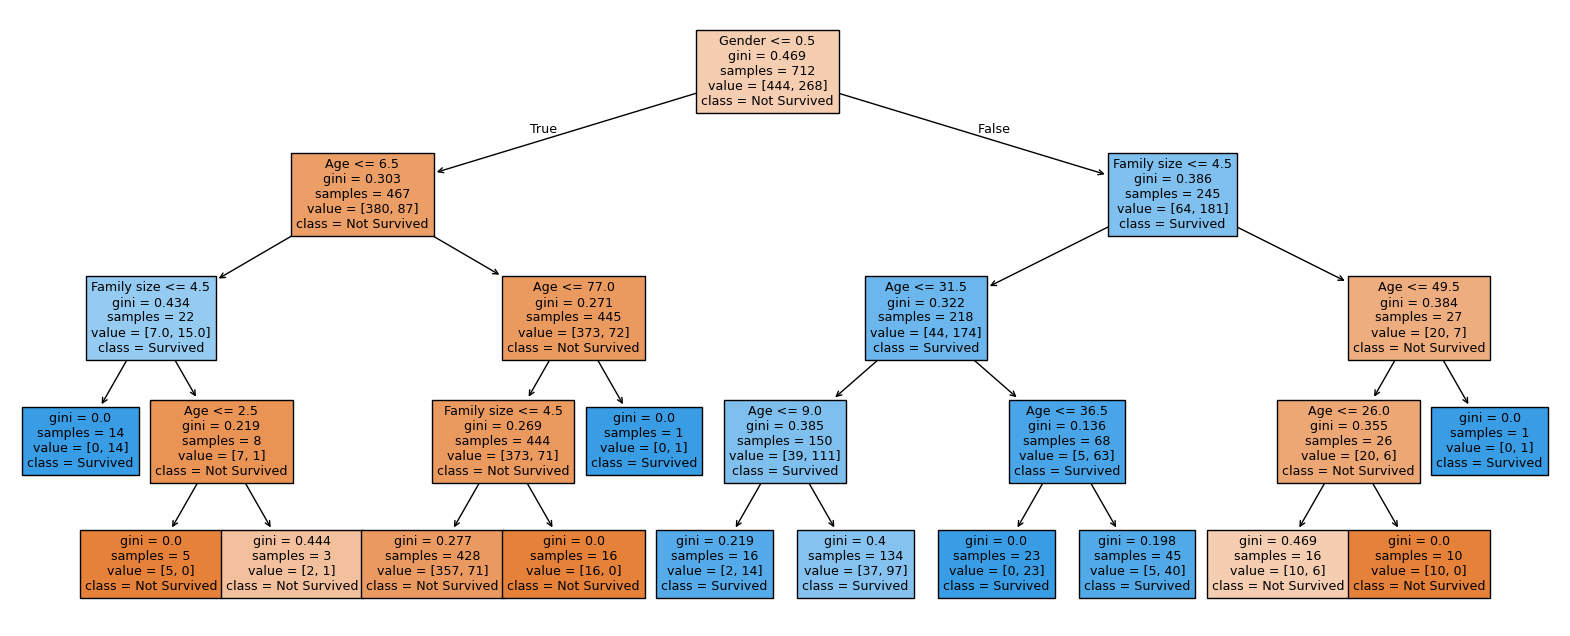

In [126]:
#Step 6:Plot a decision tree and give a large figure size
from sklearn.tree import plot_tree
plt.figure(figsize=(20,8))
plot_tree(dt,filled=True,feature_names=X.columns,class_names=['Not Survived','Survived'])
plt.show()

In [127]:
#Step 7:Cross validation with 5 folds
from sklearn.model_selection import cross_val_score
cv_scores=cross_val_score(dt,X,y,cv=5)
print(f'Cross validation scores:{cv_scores}')

'''
Cross-validation tests the model on different parts of the data
Gives a more reliable accuracy score.
'''

Cross validation scores:[0.83240223 0.8258427  0.82022472 0.79775281 0.84831461]


'\nCross-validation tests the model on different parts of the data\nGives a more reliable accuracy score.\n'

**Train the model on random forest**

In [128]:
#Step 8:Train a random forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
rf.fit(x_train,y_train)

#Predict and evaluate
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)


0.8044692737430168

In [129]:
#Step 9:Print the classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        Died       0.81      0.88      0.84       105
    Survived       0.80      0.70      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



In [130]:
#Compare accuracies
print("Decision tree accuracy:",accuracy_score(y_test,y_pred))
print("Random forest accuracy:",accuracy_score(y_test,y_pred))

Decision tree accuracy: 0.8044692737430168
Random forest accuracy: 0.8044692737430168
